In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt

In [26]:
LR = 0.01
batch_size = 32
epoch =12

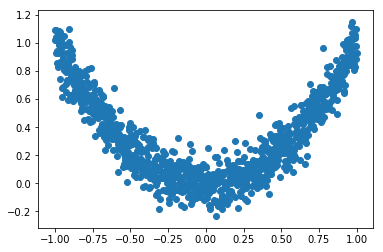

In [27]:
x = torch.unsqueeze(torch.linspace(-1, 1,1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size())) #pow = x**2
plt.scatter(x.numpy(),y.numpy())
plt.show()

In [28]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=batch_size, shuffle=True)

In [29]:
class Network(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(1, 20)
        self.out = torch.nn.Linear(20, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return x

In [30]:
net_SGD =Network()
net_Momentum =Network()
net_RMSprop =Network()
net_Adam =Network()

In [31]:
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR,alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(),lr=LR, betas=(0.9,0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

In [32]:
loss_func = torch.nn.MSELoss()
losses_his = [[],[],[],[]]

No handles with labels found to put in legend.


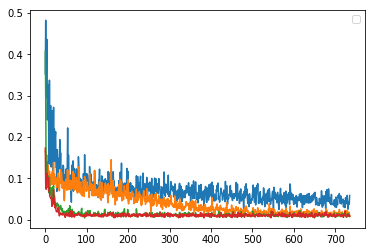

In [37]:
for epoch in range(epoch):
    for step, (batch_x, batch_y) in enumerate(loader):
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(batch_x)
            loss = loss_func(output, batch_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data[0])

for i, l_his in enumerate(losses_his):
    plt.plot(l_his)
plt.legend(loc='best')
plt.show()